In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,scorer,f1_score,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

C:\Users\Marc\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
train=pd.read_csv('data/final_train.csv')
test=pd.read_csv('data/final_test.csv')

In [3]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    1000 non-null   float64
 1   Sex         1000 non-null   int64  
 2   Age         1000 non-null   float64
 3   SibSp       1000 non-null   float64
 4   Parch       1000 non-null   float64
 5   Fare        1000 non-null   float64
 6   Cabin       1000 non-null   int64  
 7   Embarked C  1000 non-null   int64  
 8   Embarked Q  1000 non-null   int64  
 9   Embarked S  1000 non-null   int64  
 10  Pclass 1    1000 non-null   int64  
 11  Pclass 2    1000 non-null   int64  
 12  Pclass 3    1000 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 101.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    0 non-null      fl

## Section 1: Defining ML model

Since it's a classification problem we will use Random Forest, Logistic Regression and Decision Tree.

In [4]:
def get_model(name):
    if name=='Logistic':
        return LogisticRegression(C=1.5, max_iter=100, solver='liblinear')
    elif name=='DecisionTree':
        return DecisionTreeClassifier(criterion='entropy')
    elif name=='RandomForest':
        return RandomForestClassifier(n_estimators=200)

## Section 2: Training

Since in final_test.csv we don't have the target variables we will have to split train into training samples and validation samples in order to evaluate the performance of the models.

Using evaluation metrics we can conclude that the best models are the Random Forest and Decision Tree.

In [5]:
training, val = train_test_split(train, test_size = .15 ,random_state = 33)
cols = [col for col in train.columns if col not in ("Survived")]
train_x = training[cols]
train_y = training["Survived"]
val_x = val[cols]
val_y = val["Survived"]

In [6]:
def evaluate_model(model, train_x,train_y, val_x, val_y, cols, cf = 'coefficients'):
    # Training
    model=model.fit(train_x,train_y)
    # Predicting validation
    pred_values=model.predict(val_x)
    pred_proba=model.predict_proba(val_x)
    
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(model.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(model.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print('Accuracy Score of the model:',accuracy_score(val_y, pred_values))
    print('Classification Report:')
    print(classification_report(val_y, pred_values, target_names=['No Survived', 'Survived']))
    print('Confusion matrix:')
    plot_confusion_matrix(model, val_x, val_y)
    
    plt.figure(figsize=(8,5))
    plt.title('Probability Density Chart')
    sns.distplot(pred_proba[:,1][val_y==1],hist=False,color=(0.3,0.5,0.8),label='Survived')
    sns.distplot(pred_proba[:,1][val_y==0],hist=False,color=(1,1,0.5),label='No Survived')
    plt.legend()
    plt.show()
    
    coef_sumry.reset_index(inplace=True)
    coef_sumry['colors'] = ['red' if x < 0 else 'green' for x in coef_sumry['coefficients']]
    coef_sumry
    
    plt.figure(figsize=(10,7), dpi= 80)
    plt.hlines(y=coef_sumry.index, xmin=0, xmax=coef_sumry.coefficients, color=coef_sumry.colors, alpha=0.4, linewidth=5)
    plt.gca().set(ylabel='$Features$', xlabel='$Coefficients$')
    plt.yticks(coef_sumry.index, coef_sumry.features, fontsize=12)
    plt.title('Feature Importance', fontdict={'size':20})
    plt.grid(linestyle='--', alpha=0.5)
    plt.show()
    
    return model

### Section 2.1: Logistic Regression

Accuracy Score of the model: 0.8133333333333334
Classification Report:
              precision    recall  f1-score   support

 No Survived       0.79      0.84      0.81        73
    Survived       0.84      0.79      0.81        77

    accuracy                           0.81       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.81      0.81      0.81       150

Confusion matrix:


C:\Users\Marc\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Marc\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


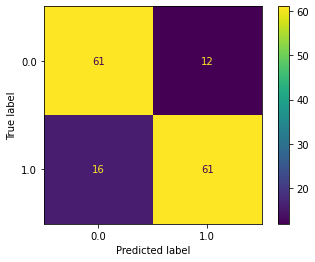

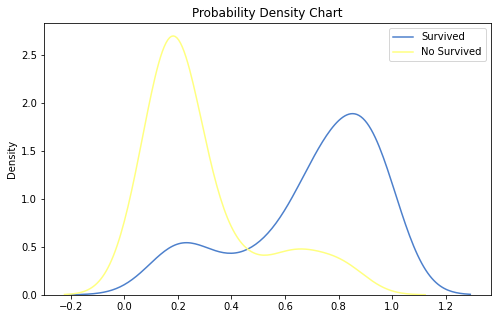

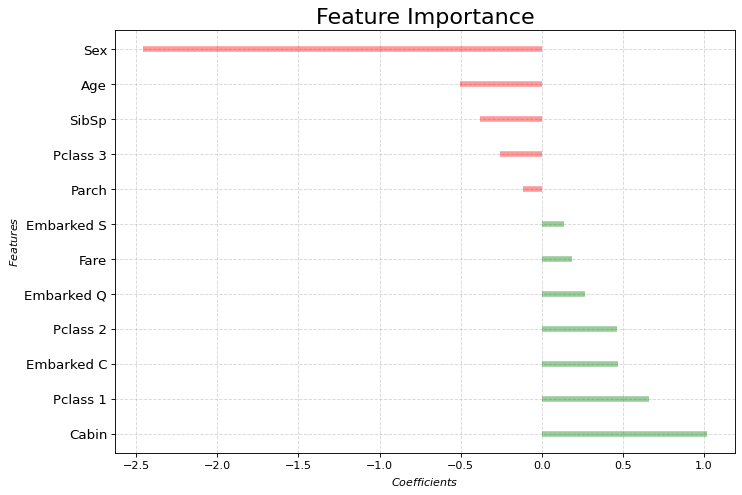

In [7]:
model=get_model('Logistic')
lr=evaluate_model(model, train_x,train_y, val_x, val_y, cols)

### Section 2.2: Decision Tree

Accuracy Score of the model: 0.8666666666666667
Classification Report:
              precision    recall  f1-score   support

 No Survived       0.90      0.82      0.86        73
    Survived       0.84      0.91      0.88        77

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150

Confusion matrix:


C:\Users\Marc\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Marc\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


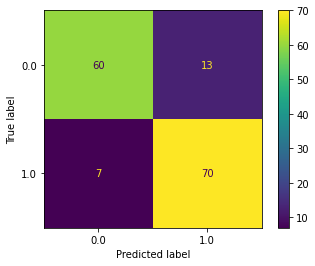

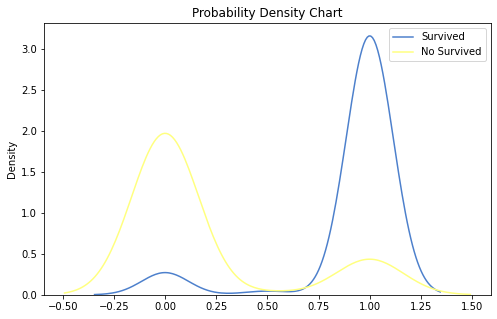

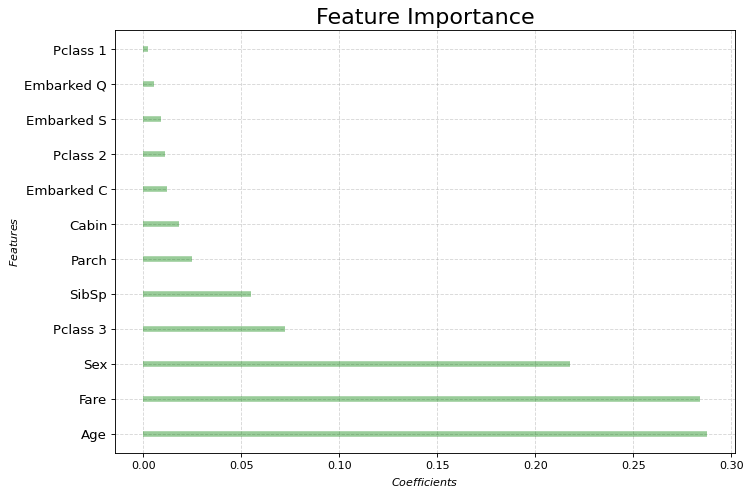

In [8]:
model=get_model('DecisionTree')
dt=evaluate_model(model, train_x,train_y, val_x, val_y, cols, "features")

### Section 2.3: Random Forest

Accuracy Score of the model: 0.8666666666666667
Classification Report:
              precision    recall  f1-score   support

 No Survived       0.90      0.82      0.86        73
    Survived       0.84      0.91      0.88        77

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150

Confusion matrix:


C:\Users\Marc\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Marc\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


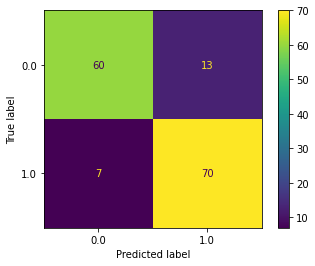

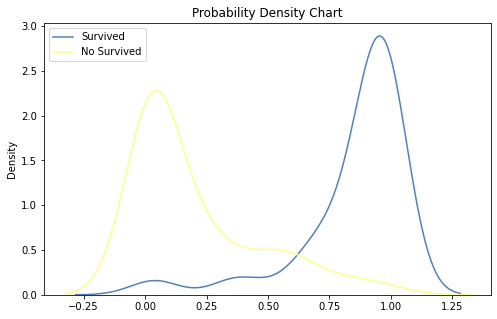

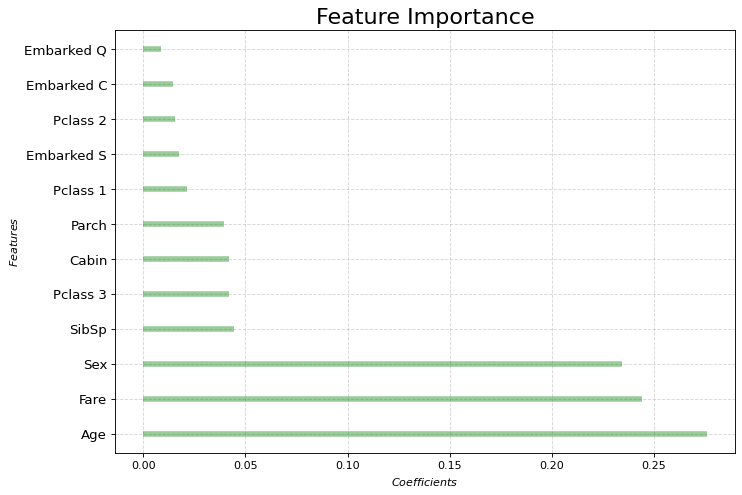

In [9]:
model=get_model('RandomForest')
rf=evaluate_model(model, train_x,train_y, val_x, val_y, cols, "features")

## Section 3: Predicting test values and saving final submission

In [10]:
test_x=test[cols]
test_y=rf.predict(test_x)

In [14]:
final_submission=pd.DataFrame()
final_submission['PassengerID']=np.arange(892,892+len(test_y))
final_submission['Survived']=test_y.astype('int')
display(final_submission)
final_submission.to_csv('submission.csv', index=False)

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
